In [1]:
from google.colab import files
uploaded = files.upload()


Saving imdb.csv to imdb.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("imdb.csv")  # change name if needed
df = df.dropna()

print(df.head())
print(df['sentiment'].value_counts())


                                              review sentiment
0  I loved the movie, it was fantastic and thrill...  positive
1                Absolutely terrible. Waste of time.  negative
2  One of the best performances I’ve seen in a wh...  positive
3     I hated this movie. Horrible acting and story.  negative
4  The film was amazing, really emotional and pow...  positive
sentiment
positive    5
negative    5
Name: count, dtype: int64


In [4]:
# Encode labels
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

X = df['review']
y = df['sentiment']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [5]:
svm_imdb = LinearSVC()
svm_imdb.fit(X_train_vec, y_train)
y_pred = svm_imdb.predict(X_test_vec)


Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      0.50      0.67         2
    Positive       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



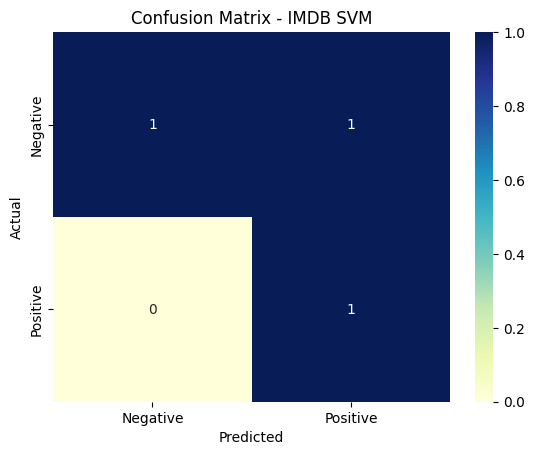

In [6]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu", fmt='d',
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix - IMDB SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [7]:
sample = ["Absolutely fantastic movie!"]
sample_vec = vectorizer.transform(sample)
pred = svm_imdb.predict(sample_vec)

print("Predicted Sentiment:", "Positive" if pred[0] == 1 else "Negative")


Predicted Sentiment: Positive
